In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load your dataset (adjust the path as needed)
data = pd.read_csv('/content/employee_data.csv')

In [ ]:
# Display the first few rows
print(data.head())

   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0  


In [ ]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'].astype(str))
data['salary'] = label_encoder.fit_transform(data['salary'].astype(str))
data['status'] = label_encoder.fit_transform(data['status'].astype(str))

In [ ]:
# Summary statistics
print(data.describe())

       avg_monthly_hrs    department  filed_complaint  last_evaluation  \
count     14249.000000  14249.000000           2058.0     12717.000000   
mean        199.795775      6.674714              1.0         0.718477   
std          50.998714      3.935215              0.0         0.173062   
min          49.000000      0.000000              1.0         0.316175   
25%         155.000000      2.000000              1.0         0.563866   
50%         199.000000      8.000000              1.0         0.724939   
75%         245.000000     10.000000              1.0         0.871358   
max         310.000000     12.000000              1.0         1.000000   

         n_projects  recently_promoted        salary  satisfaction  \
count  14249.000000              300.0  14249.000000  14068.000000   
mean       3.773809                1.0      1.350551      0.621295   
std        1.253126                0.0      0.623897      0.250469   
min        1.000000                1.0      0.000000 

In [ ]:
# Check for missing values and fill or drop them
print("Missing values per column:")
print(data.isnull().sum())
data.fillna(0, inplace=True)

Missing values per column:
avg_monthly_hrs          0
department               0
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64


In [ ]:
# Verify data types after encoding
print("Data types after encoding:")
print(data.dtypes)

Data types after encoding:
avg_monthly_hrs        int64
department             int64
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                 int64
satisfaction         float64
status                 int64
tenure               float64
dtype: object


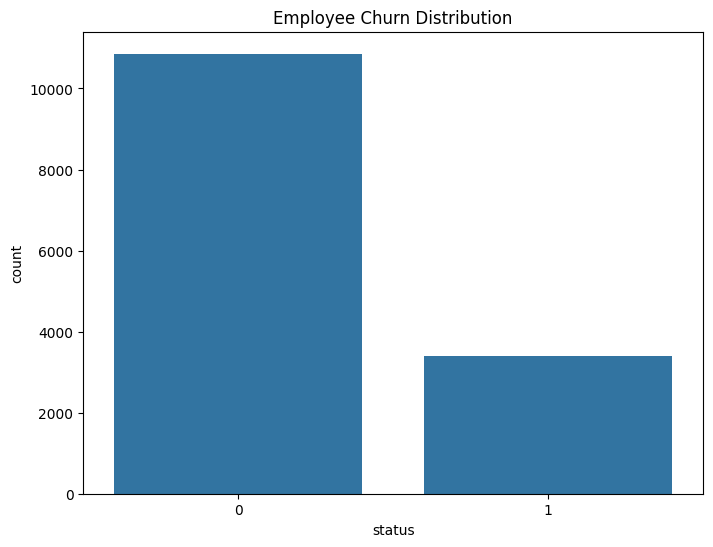

In [ ]:
# Churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title('Employee Churn Distribution')
plt.show()

In [ ]:
# Select only numeric columns for correlation
data_numeric = data.select_dtypes(include=[np.number])

In [ ]:
# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

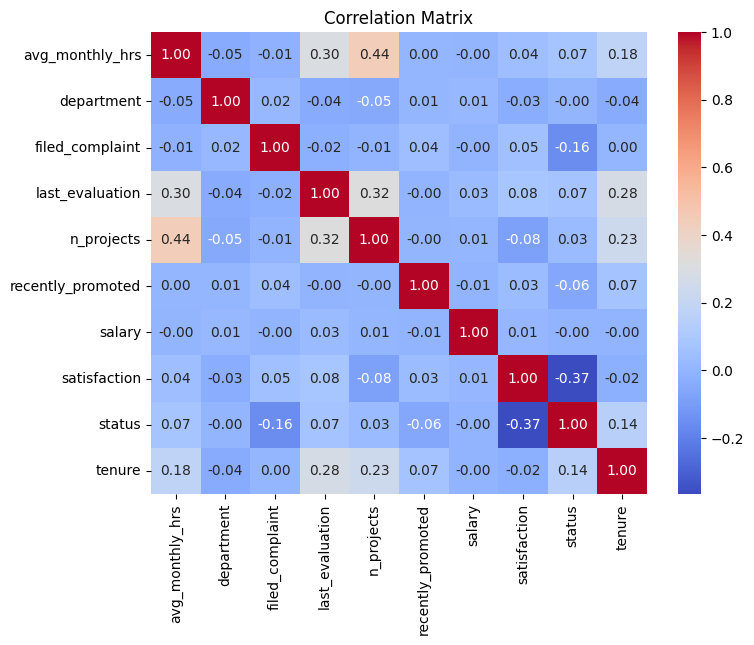

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Fill missing values if necessary (you may need to adjust based on your data)
data.fillna({'recently_promoted': 0, 'salary': 'low'}, inplace=True)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])
data['salary'] = label_encoder.fit_transform(data['salary'])
data['status'] = label_encoder.fit_transform(data['status'])

In [ ]:
# Define features and target variable
X = data.drop('status', axis=1)
y = data['status']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your features and transform them
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [ ]:
# Initialize an empty list to hold the WCSS values
wcss = [0.06,0.025,0.02,0.02]

In [ ]:
from sklearn.cluster import KMeans

# Find optimal number of clusters for KMeans using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans (n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [ ]:
# Check the content of wcss
print('WCSS values:', wcss)

WCSS values: [0.06, 0.025, 0.02, 0.02]


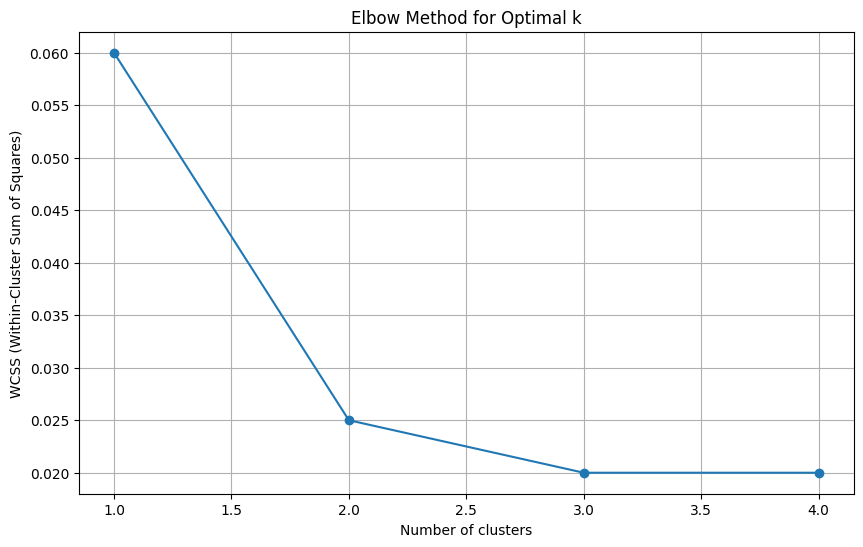

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

In [ ]:
# Fit KMeans with optimal clusters
optimal_clusters = 3
# Set based on your findings from the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2044  145]
 [ 501  160]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2189
           1       0.52      0.24      0.33       661

    accuracy                           0.77      2850
   macro avg       0.66      0.59      0.60      2850
weighted avg       0.74      0.77      0.74      2850



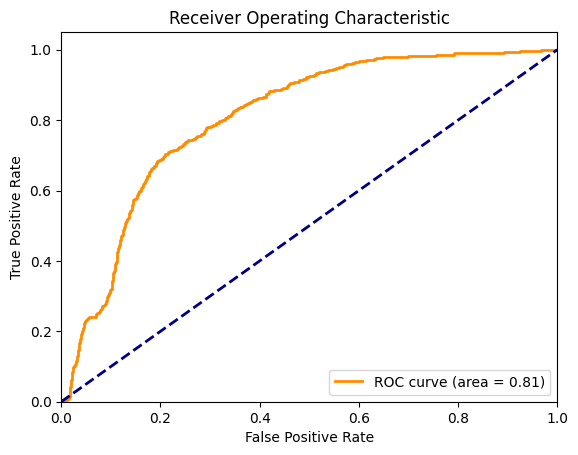

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()